# Calorimeter Clusters Collection

A jet is built from these clusters. Lets take a dive into the raw versions.

In [1]:
from func_adl_servicex_xaodr21 import SXDSAtlasxAODR21
import matplotlib.pyplot as plt
from config import rucio_zee_r21_mc

In [2]:
ds = SXDSAtlasxAODR21(rucio_zee_r21_mc, backend='dev_xaod')

There are several `CaloCluster` collections. For this we'll go after `egammaClusters`.

_TODO_: Why doesn't this work for `CaloCalTopoClusters`, which are in the dataset for this according to `checkxAOD.py`. Fails with a "no metadata for branch" error.

In [3]:
jets = (ds
          .SelectMany(lambda e: e.CaloClusters('egammaClusters'))
          .Select(lambda cluster: cluster.pt() / 1000.0)
          .AsAwkwardArray('ClusterPt')
          .value())

rucio://mc15_13TeV:m...:   0%|          | 0/9000000000.0 [00:00]

        rucio://mc15_13TeV:m... Downloaded:   0%|          | 0/9000000000.0 [00:00]

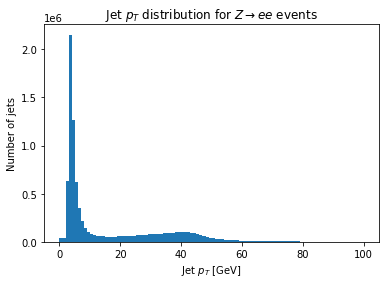

In [5]:
plt.hist(jets.ClusterPt, bins=100, range=(0, 100))
plt.xlabel('Jet $p_T$ [GeV]')
plt.ylabel('Number of jets')
_ = plt.title('Jet $p_T$ distribution for $Z\\rightarrow ee$ events')

## The Datamodel

The data model when this documentation was last built was:

In [6]:
from func_adl_servicex_xaodr21.xAOD.calocluster_v1 import CaloCluster_v1
help(CaloCluster_v1)

Help on class CaloCluster_v1 in module func_adl_servicex_xaodr21.xAOD.calocluster_v1:

class CaloCluster_v1(builtins.object)
 |  A class
 |  
 |  Methods defined here:
 |  
 |  e(self) -> float
 |      A method
 |  
 |  et(self) -> float
 |      A method
 |  
 |  eta(self) -> float
 |      A method
 |  
 |  getClusterEtaSize(self) -> int
 |      A method
 |  
 |  getClusterPhiSize(self) -> int
 |      A method
 |  
 |  m(self) -> float
 |      A method
 |  
 |  nSamples(self) -> int
 |      A method
 |  
 |  phi(self) -> float
 |      A method
 |  
 |  pt(self) -> float
 |      A method
 |  
 |  rapidity(self) -> float
 |      A method
 |  
 |  samplingPattern(self) -> int
 |      A method
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## Further Information

* The [`xAOD::CaloCluster_v1` C++ header file](https://gitlab.cern.ch/atlas/athena/-/blob/21.2/Event/xAOD/xAODCaloEvent/xAODCaloEvent/versions/CaloCluster_v1.h) with all the inline documentation.